<a href="https://colab.research.google.com/github/nibbe99/Malware/blob/main/Medical_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [18]:
#Create X & Y values   (features and labels)
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

###Create training and set test

In [19]:
# Get 20 % of test data RANDOM SHUFFLED
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2, random_state = 42)
len(x), len(trainX), len(testX)

(1338, 1070, 268)

###Build a neural network

In [96]:
tf.random.set_seed(42)

#Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics = ["mae"])

#Fit
history = insurance_model.fit(trainX, trainY, epochs=150, verbose=0)

In [22]:
insurance_model.summary(), insurance_model.evaluate(testX, testY)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,205 (133.62 KB)

 Trainable params: 11,401 (44.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,804 (89.08 KB)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1806.5372 - mae: 1806.5372  


(None, [1795.9808349609375, 1795.9808349609375])

Text(0.5, 0, 'epochs')

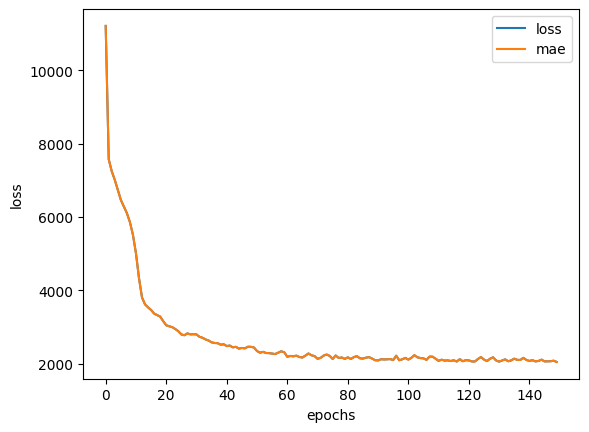

In [23]:
#Plot history (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [26]:
xAxis = tf.range(0, len(testX))
xAxis, testY[0:len(testX)]

xAxis = tf.range(0, len(testX))

yAxis = testY.to_numpy()
yAxis = tf.cast(yAxis, tf.float32)

In [45]:
insurance_modelPredictYAxis = tf.cast(insurance_modelPredict, tf.float32)

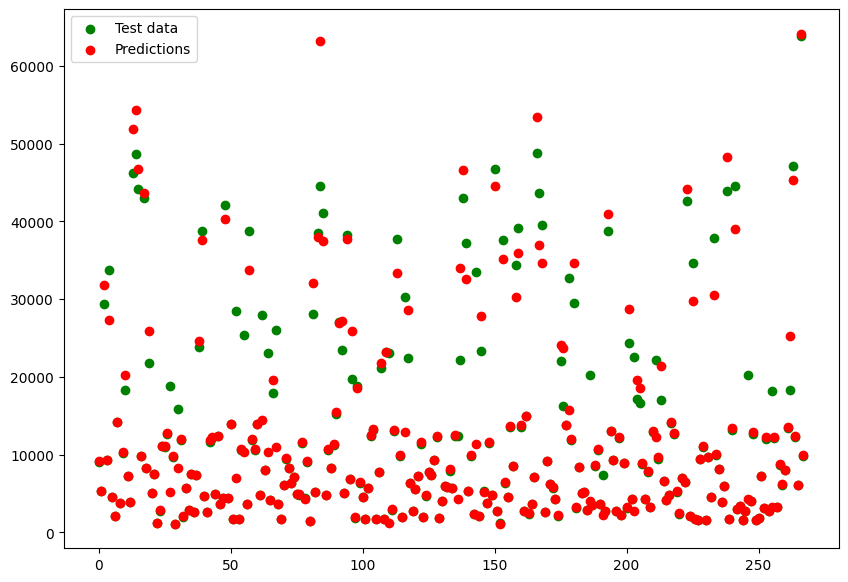

In [28]:
plt.figure(figsize=(10,7))
#plot predictions
plt.scatter(xAxis,yAxis , c='g', label="Test data")
plt.scatter(xAxis, insurance_modelPredictYAxis, c='r', label="Predictions")
#show legend
plt.legend()

(array([[ 9160.427 ],
        [ 5268.978 ],
        [31771.86  ],
        [ 9281.372 ],
        [27261.383 ],
        [ 4565.9307],
        [ 2101.8936],
        [14206.188 ],
        [ 3759.8054],
        [10299.534 ]], dtype=float32),
 764      9095.06825
 887      5272.17580
 890     29330.98315
 1293     9301.89355
 259     33750.29180
 1312     4536.25900
 899      2117.33885
 752     14210.53595
 1286     3732.62510
 707     10264.44210
 Name: charges, dtype: float64)

In [94]:
percentageMean = 0
for i in range(len(yAxis)):
  if insurance_modelPredictYAxis[i] > yAxis[i]:
    diff = insurance_modelPredictYAxis[i] - yAxis[i]
    percentage = (diff/yAxis[i]) * 100
    percentage = 100 - percentage
   # tf.print(percentage)
    percentageMean += percentage
  else:
    #tf.print(insurance_modelPredictYAxis[i]/yAxis[i] * 100)
    percentageMean+= insurance_modelPredictYAxis[i]/yAxis[i] * 100

percentageMean = percentageMean/len(yAxis)
tf.print("This AI model has ", percentageMean, "% accuracy on predictability")




This AI model has  [92.381546] % accuracy on predictability
